# Correlación entre contaminantes

Se hace la correlación cruzada (cross correlation) entre los distintos contaminantes. Se saca un promedio de todas las estaciones.

In [1]:
# Se importan bibliotecas necesarias

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix

os.chdir("/home/pradel/Desktop/Forecast_CDMX_pollution/datasets/por_hora")

In [ ]:
# Se importan los archivos csv

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
# Se concatenan los archivos
#cont_hora_todos = pd.concat([pd.read_csv(f) for f in all_filenames])

#cont_hora_todos.to_csv("cont_hora_todos.csv", index=False, encoding = 'utf-8-sig')

In [2]:
# Se importa el archivo csv con los datos usando pandas

data = pd.read_csv("/home/pradel/Desktop/Forecast_CDMX_pollution/datasets/por_hora/cont_hora_todos.csv")

In [3]:
data.head()

,Unnamed: 0,fecha,hora,dia,mes,id_station,UVA,UVB,PA,CO,...,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,0,2014-01-01 01:00:00,1,1,1,ACO,NaN,NaN,NaN,0.3,...,NaN,9.0,NaN,NaN,2.0,89.0,6.8,2.5,323.0,57.0
1,1,2014-01-01 01:00:00,1,1,1,ATI,NaN,NaN,NaN,0.5,...,20.0,9.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,69.0
2,2,2014-01-01 01:00:00,1,1,1,CAM,NaN,NaN,NaN,0.5,...,34.0,5.0,54.0,15.0,14.0,NaN,NaN,NaN,NaN,69.0
3,3,2014-01-01 01:00:00,1,1,1,CHO,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,5.0,84.0,9.4,1.1,61.0,84.0
4,5,2014-01-01 01:00:00,1,1,1,CUA,NaN,NaN,NaN,1.3,...,54.0,4.0,NaN,NaN,11.0,83.0,7.5,1.3,168.0,83.0


## Estructuración del dataframe

In [4]:
data = data.sort_values(by='fecha')

In [5]:
del data['Unnamed: 0']

In [6]:
del data['mes']

In [7]:
del data['dia']

In [8]:
del data['hora']

In [9]:
data = data.reset_index(drop = True)

In [10]:
data.head()

,fecha,id_station,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,2012-01-01 00:00:00,ACO,NaN,NaN,NaN,0.1,1.0,4.0,4.0,24.0,NaN,NaN,1.0,71.0,10.9,3.8,30.0,6.0
1,2012-01-01 00:00:00,TLA,0.0,0.0,NaN,0.2,7.0,26.0,33.0,8.0,9.0,7.0,4.0,71.0,11.5,2.5,346.0,16.0
2,2012-01-01 00:00:00,XAL,NaN,NaN,NaN,0.1,6.0,12.0,18.0,19.0,10.0,5.0,1.0,66.0,11.8,NaN,NaN,15.0
3,2012-01-01 00:00:00,TAH,NaN,NaN,NaN,0.7,2.0,15.0,18.0,10.0,NaN,NaN,1.0,73.0,9.9,NaN,NaN,23.0
4,2012-01-01 00:00:00,SUR,NaN,NaN,NaN,0.5,NaN,NaN,NaN,13.0,NaN,NaN,3.0,65.0,12.5,3.0,317.0,13.0


## Correlación entre los contaminantes

In [11]:
data = data.groupby('fecha', as_index = False).mean()

In [12]:
data = data.round(1)
data.head(5)

,fecha,UVA,UVB,PA,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,2012-01-01 00:00:00,0.0,0.0,590.0,0.3,2.6,13.8,16.2,15.1,9.4,6.3,1.6,68.3,11.4,3.2,294.9,14.8
1,2012-01-01 01:00:00,0.0,0.0,587.0,1.4,30.0,39.8,69.5,5.5,77.0,136.9,7.2,68.8,9.7,1.4,180.0,174.3
2,2012-01-01 02:00:00,0.0,0.0,587.0,1.7,39.7,40.0,79.6,4.3,121.0,38.0,8.2,72.6,9.1,1.6,139.6,164.6
3,2012-01-01 03:00:00,0.0,0.0,587.0,1.8,40.8,39.1,79.6,4.6,125.1,36.7,7.6,74.1,8.6,1.1,232.6,172.9
4,2012-01-01 04:00:00,0.0,0.0,587.0,2.0,51.2,37.8,88.9,4.1,129.6,37.0,6.9,75.3,8.2,1.0,225.6,167.6


In [ ]:
@interact
def correlaciones(X = list(data.select_dtypes('number').columns),
                  Y = list(data.select_dtypes('number').columns)):
        
    print(f"Correlación: {data[X].corr(data[Y])}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(15,10))
plt.title(u'Correlación entre contaminantes de 2012 a 2018', y=1.05, size=16)

mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(data.corr(), mask=mask, linewidths=0.1,vmin = -1.0, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
scatter_matrix(data, figsize=(15,15))
plt.show()

## Autocorrelación entre contaminantes

In [13]:
# Función para hacer el lag
def data_lag(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [14]:
NON_DER = ['date',]

In [15]:
data_72 = data_lag(data, 72, NON_DER)

In [16]:
data_72_corr = data_72.corr()

## Correlaciones entre PM10 y los demás contaminantes

In [17]:
PM10_72 = data_72_corr[["PM10"]]
PM10_72.reset_index(inplace=True)

In [18]:
PM10_72['indicador contaminante'] = PM10_72['index'].astype(str).str[0:3]

In [ ]:
PM10_72

### PM10 y UVA

In [ ]:
uva = PM10_72['indicador contaminante'] == "UVA"
PM10_UVA_72 = PM10_72[uva]

In [ ]:
PM10_UVA_72.reset_index(inplace = True, drop = True)

In [ ]:
del PM10_UVA_72['indicador contaminante']

In [ ]:
PM10_UVA_72 = PM10_UVA_72.rename(columns = {'index' : 'Contaminante'})

In [ ]:
PM10_UVA_72['horas'] = PM10_UVA_72.index
PM10_UVA_72.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_uva = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_UVA_72, marker = 'o',  color='b', ax=ax)
#sns.scatterplot(x = 'horas', y = 'PM10', data = PM10_UVA_72, markers= True,  color='b', ax=ax)

pm10_uva.axes.set_title("Correlacion entre PM10 y UVA",fontsize=20)
pm10_uva.set_xlabel("Horas",fontsize=15)
pm10_uva.set_ylabel("Correlación",fontsize=15)
pm10_uva.tick_params(labelsize=10)
plt.show()

### PM10 y UVB

In [ ]:
PM10_UVB_72 = PM10_72[PM10_72['indicador contaminante'].isin(['UVB'])]

In [ ]:
PM10_UVB_72.reset_index(inplace = True, drop = True)

In [ ]:
del PM10_UVB_72['indicador contaminante']

In [ ]:
PM10_UVB_72 = PM10_UVB_72.rename(columns = {'index' : 'Contaminante'})

In [ ]:
PM10_UVB_72['horas'] = PM10_UVB_72.index
PM10_UVB_72.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_uvb = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_UVB_72, marker = 'o',  color='r', ax=ax)

pm10_uvb.axes.set_title("Correlacion entre PM10 y UVB",fontsize=20)
pm10_uvb.set_xlabel("Horas",fontsize=15)
pm10_uvb.set_ylabel("Correlación",fontsize=15)
pm10_uvb.tick_params(labelsize=10)
plt.show()

### PM10 y PA

In [ ]:
PM10_PA_72 = PM10_72[PM10_72['indicador contaminante'].isin(['PA', 'PA_'])]

In [ ]:
PM10_PA_72.reset_index(inplace = True, drop = True)

In [ ]:
del PM10_PA_72['indicador contaminante']

In [ ]:
PM10_PA_72 = PM10_PA_72.rename(columns = {'index' : 'Contaminante'})

In [ ]:
PM10_PA_72['horas'] = PM10_PA_72.index
PM10_PA_72.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_pa = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_PA_72, marker = 'o',  color='g', ax=ax)

pm10_pa.axes.set_title("Correlacion entre PM10 y PA",fontsize=20)
pm10_pa.set_xlabel("Horas",fontsize=15)
pm10_pa.set_ylabel("Correlación",fontsize=15)
pm10_pa.tick_params(labelsize=10)
plt.show()

### PM10 y CO

In [19]:
PM10_CO_72 = PM10_72[PM10_72['indicador contaminante'].isin(['CO', 'CO_'])]

In [20]:
PM10_CO_72.reset_index(inplace = True, drop = True)

In [21]:
del PM10_CO_72['indicador contaminante']

In [22]:
PM10_CO_72 = PM10_CO_72.rename(columns = {'index' : 'Contaminante'})

In [23]:
PM10_CO_72['horas'] = PM10_CO_72.index
PM10_CO_72.head()

,Contaminante,PM10,horas
0,CO,0.593283,0
1,CO_1,0.570232,1
2,CO_2,0.490675,2
3,CO_3,0.389232,3
4,CO_4,0.296713,4


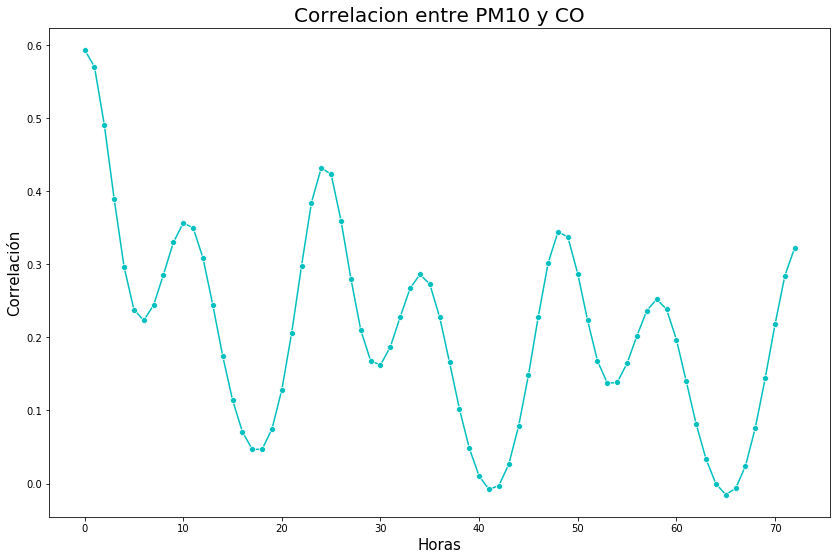

In [24]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_co = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_CO_72, marker = 'o',  color='c', ax=ax)

pm10_co.axes.set_title("Correlacion entre PM10 y CO",fontsize=20)
pm10_co.set_xlabel("Horas",fontsize=15)
pm10_co.set_ylabel("Correlación",fontsize=15)
pm10_co.tick_params(labelsize=10)
plt.show()

### PM10 y NO

In [25]:
PM10_NO_72 = PM10_72[PM10_72['indicador contaminante'].isin(['NO', 'NO_'])]

In [26]:
PM10_NO_72.reset_index(inplace = True, drop = True)

In [27]:
del PM10_NO_72['indicador contaminante']

In [28]:
PM10_NO_72 = PM10_NO_72.rename(columns = {'index' : 'Contaminante'})

In [29]:
PM10_NO_72['horas'] = PM10_NO_72.index
PM10_NO_72.head()

,Contaminante,PM10,horas
0,NO,0.423978,0
1,NO_1,0.463029,1
2,NO_2,0.429512,2
3,NO_3,0.351797,3
4,NO_4,0.263245,4


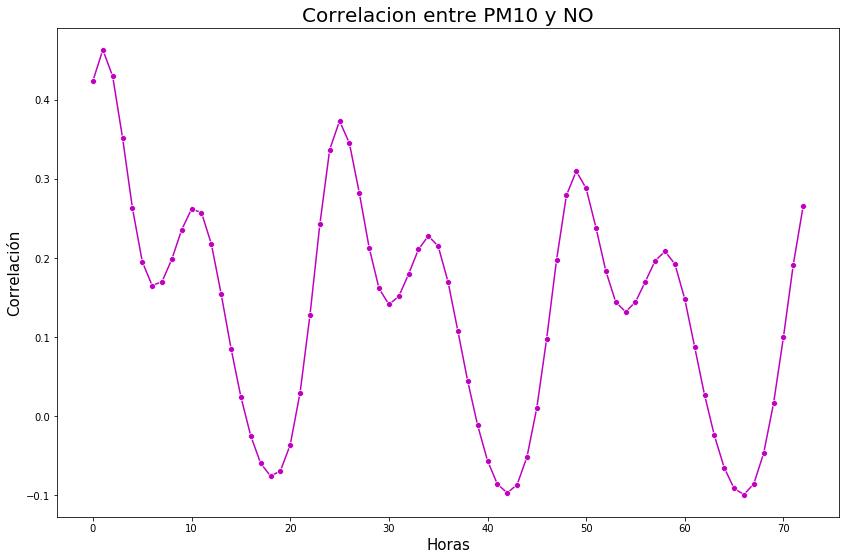

In [30]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_no = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_NO_72, marker = 'o',  color='m', ax=ax)

pm10_no.axes.set_title("Correlacion entre PM10 y NO",fontsize=20)
pm10_no.set_xlabel("Horas",fontsize=15)
pm10_no.set_ylabel("Correlación",fontsize=15)
pm10_no.tick_params(labelsize=10)
plt.show()

### PM10 y NO2

In [31]:
PM10_NO2_72 = PM10_72[PM10_72['indicador contaminante'].isin(['NO2'])]

In [32]:
PM10_NO2_72.reset_index(inplace = True, drop = True)

In [33]:
del PM10_NO2_72['indicador contaminante']

In [34]:
PM10_NO2_72 = PM10_NO2_72.rename(columns = {'index' : 'Contaminante'})

In [35]:
PM10_NO2_72['horas'] = PM10_NO2_72.index
PM10_NO2_72.head()

,Contaminante,PM10,horas
0,NO2,0.615966,0
1,NO2_1,0.545380,1
2,NO2_2,0.462602,2
3,NO2_3,0.391413,3
4,NO2_4,0.349949,4


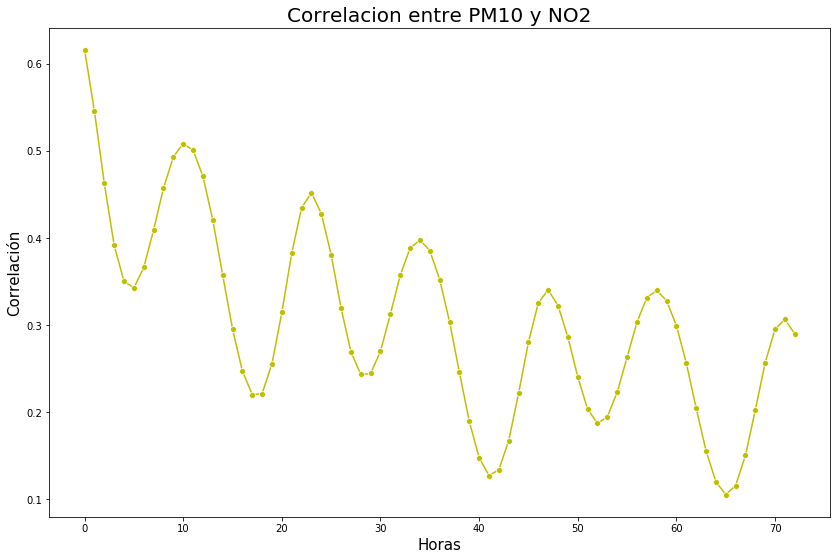

In [36]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_no2 = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_NO2_72, marker = 'o',  color='y', ax=ax)

pm10_no2.axes.set_title("Correlacion entre PM10 y NO2",fontsize=20)
pm10_no2.set_xlabel("Horas",fontsize=15)
pm10_no2.set_ylabel("Correlación",fontsize=15)
pm10_no2.tick_params(labelsize=10)
plt.show()

### PM10 y NOX

In [37]:
PM10_NOX_72 = PM10_72[PM10_72['indicador contaminante'].isin(['NOX'])]

In [38]:
PM10_NOX_72.reset_index(inplace = True, drop = True)

In [39]:
del PM10_NOX_72['indicador contaminante']

In [40]:
PM10_NOX_72 = PM10_NOX_72.rename(columns = {'index' : 'Contaminante'})

In [41]:
PM10_NOX_72['horas'] = PM10_NOX_72.index
PM10_NOX_72.head()

,Contaminante,PM10,horas
0,NOX,0.543280,0
1,NOX_1,0.551671,1
2,NOX_2,0.497568,2
3,NOX_3,0.411625,3
4,NOX_4,0.326660,4


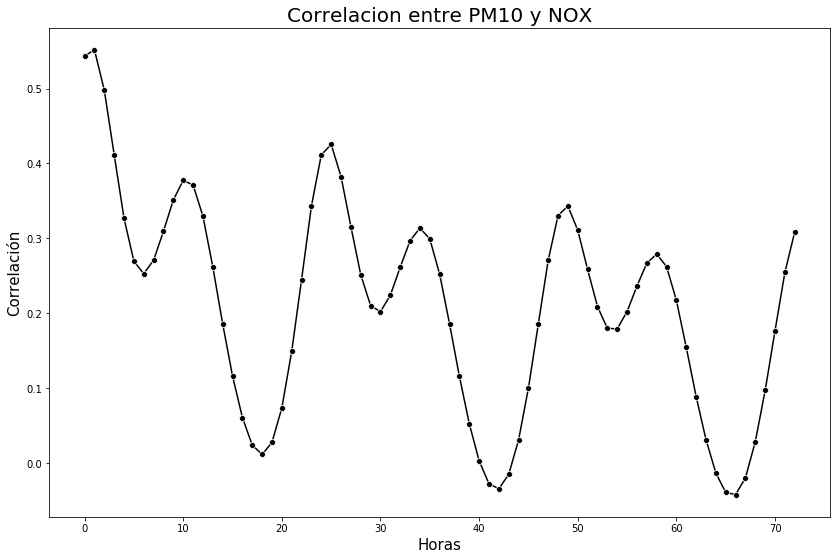

In [42]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_nox = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_NOX_72, marker = 'o',  color='k', ax=ax)

pm10_nox.axes.set_title("Correlacion entre PM10 y NOX",fontsize=20)
pm10_nox.set_xlabel("Horas",fontsize=15)
pm10_nox.set_ylabel("Correlación",fontsize=15)
pm10_nox.tick_params(labelsize=10)
plt.show()

### PM10 y 03

In [43]:
PM10_O3_72 = PM10_72[PM10_72['indicador contaminante'].isin(['O3', 'O3_'])]

In [44]:
PM10_O3_72.reset_index(inplace = True, drop = True)

In [45]:
del PM10_O3_72['indicador contaminante']

In [46]:
PM10_O3_72 = PM10_O3_72.rename(columns = {'index' : 'Contaminante'})

In [47]:
PM10_O3_72['horas'] = PM10_O3_72.index
PM10_O3_72.head()

,Contaminante,PM10,horas
0,O3,0.163479,0
1,O3_1,0.139433,1
2,O3_2,0.129914,2
3,O3_3,0.123672,3
4,O3_4,0.110398,4


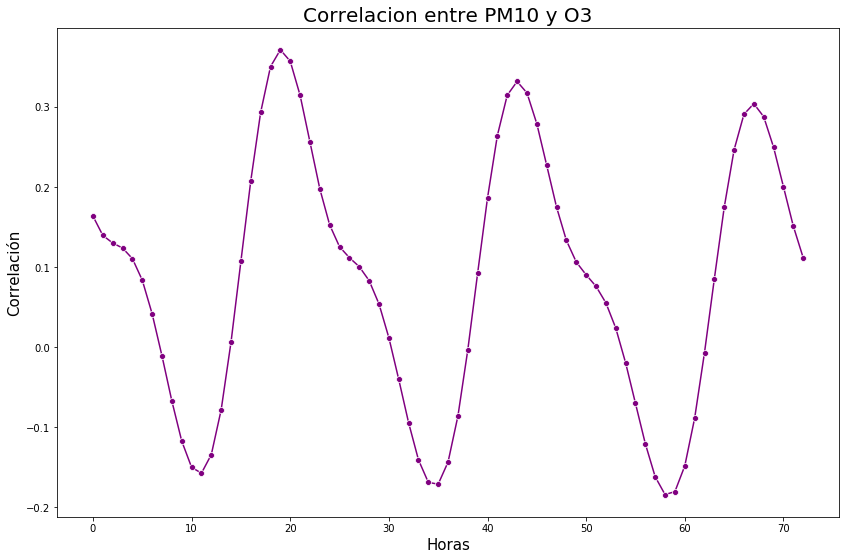

In [48]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_o3 = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_O3_72, marker = 'o',  color='#800080', ax=ax)

pm10_o3.axes.set_title("Correlacion entre PM10 y O3",fontsize=20)
pm10_o3.set_xlabel("Horas",fontsize=15)
pm10_o3.set_ylabel("Correlación",fontsize=15)
pm10_o3.tick_params(labelsize=10)
plt.show()

### PM10 y PM2.5

In [49]:
PM10_PM25_72 = PM10_72[PM10_72['indicador contaminante'].isin(['PM2', 'PM2.5'])]

In [50]:
PM10_PM25_72.reset_index(inplace = True, drop = True)

In [51]:
del PM10_PM25_72['indicador contaminante']

In [52]:
PM10_PM25_72 = PM10_PM25_72.rename(columns = {'index' : 'Contaminante'})

In [53]:
PM10_PM25_72['horas'] = PM10_PM25_72.index
PM10_PM25_72.head()

,Contaminante,PM10,horas
0,PM2.5,0.779534,0
1,PM2.5_1,0.716767,1
2,PM2.5_2,0.653884,2
3,PM2.5_3,0.593820,3
4,PM2.5_4,0.544313,4


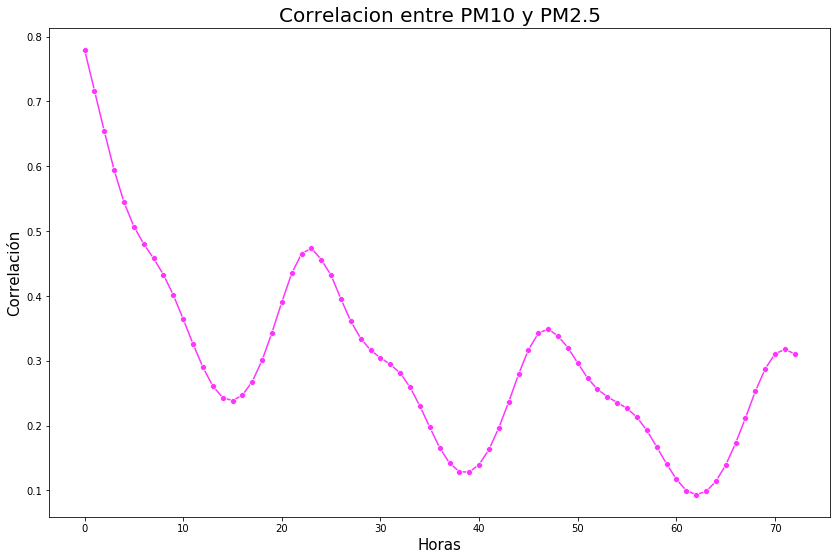

In [54]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_pm25 = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_PM25_72, marker = 'o',  color='#ff33ff', ax=ax)

pm10_pm25.axes.set_title("Correlacion entre PM10 y PM2.5",fontsize=20)
pm10_pm25.set_xlabel("Horas",fontsize=15)
pm10_pm25.set_ylabel("Correlación",fontsize=15)
pm10_pm25.tick_params(labelsize=10)
plt.show()

### PM10 Y PMCO

In [55]:
PM10_PMCO_72 = PM10_72[PM10_72['indicador contaminante'].isin(['PMC'])]

In [56]:
PM10_PMCO_72.reset_index(inplace = True, drop = True)

In [57]:
del PM10_PMCO_72['indicador contaminante']

In [58]:
PM10_PMCO_72 = PM10_PMCO_72.rename(columns = {'index' : 'Contaminante'})

In [59]:
PM10_PMCO_72['horas'] = PM10_PMCO_72.index
PM10_PMCO_72.head()

,Contaminante,PM10,horas
0,PMCO,0.890058,0
1,PMCO_1,0.807673,1
2,PMCO_2,0.692203,2
3,PMCO_3,0.579211,3
4,PMCO_4,0.485107,4


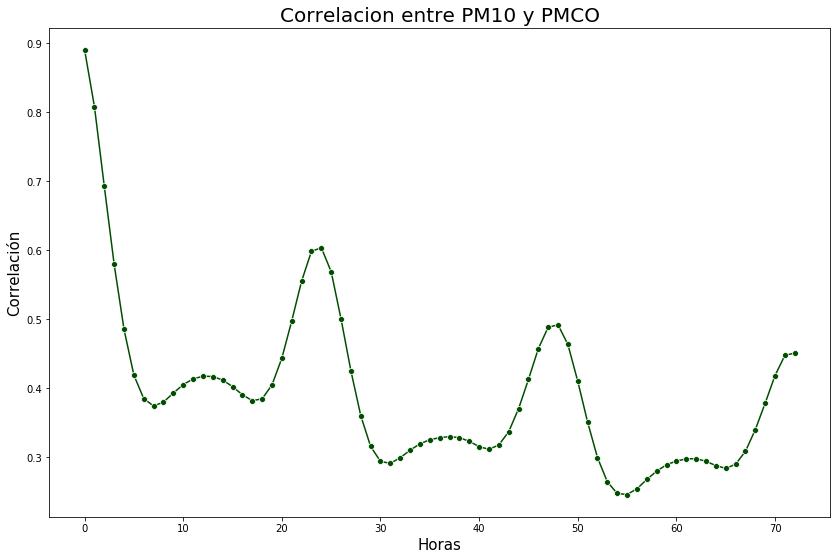

In [60]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_pmco = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_PMCO_72, marker = 'o',  color='#004d00', ax=ax)

pm10_pmco.axes.set_title("Correlacion entre PM10 y PMCO",fontsize=20)
pm10_pmco.set_xlabel("Horas",fontsize=15)
pm10_pmco.set_ylabel("Correlación",fontsize=15)
pm10_pmco.tick_params(labelsize=10)
plt.show()

### PM10 Y SO2

In [ ]:
PM10_SO2_72 = PM10_72[PM10_72['indicador contaminante'].isin(['SO2'])]

In [ ]:
PM10_SO2_72.reset_index(inplace = True, drop = True)

In [ ]:
del PM10_SO2_72['indicador contaminante']

In [ ]:
PM10_SO2_72 = PM10_SO2_72.rename(columns = {'index' : 'Contaminante'})

In [ ]:
PM10_SO2_72['horas'] = PM10_SO2_72.index
PM10_SO2_72.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_so2 = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_SO2_72, marker = 'o',  color='#ff751a', ax=ax)

pm10_so2.axes.set_title("Correlacion entre PM10 y SO2",fontsize=20)
pm10_so2.set_xlabel("Horas",fontsize=15)
pm10_so2.set_ylabel("Correlación",fontsize=15)
pm10_so2.tick_params(labelsize=10)
plt.show()

### PM10 y RH

In [61]:
PM10_RH_72 = PM10_72[PM10_72['indicador contaminante'].isin(['RH', 'RH_'])]

In [62]:
PM10_RH_72.reset_index(inplace = True, drop = True)

In [63]:
del PM10_RH_72['indicador contaminante']

In [64]:
PM10_RH_72 = PM10_RH_72.rename(columns = {'index' : 'Contaminante'})

In [65]:
PM10_RH_72['horas'] = PM10_RH_72.index
PM10_RH_72.head()

,Contaminante,PM10,horas
0,RH,-0.400048,0
1,RH_1,-0.366051,1
2,RH_2,-0.336802,2
3,RH_3,-0.309821,3
4,RH_4,-0.285927,4


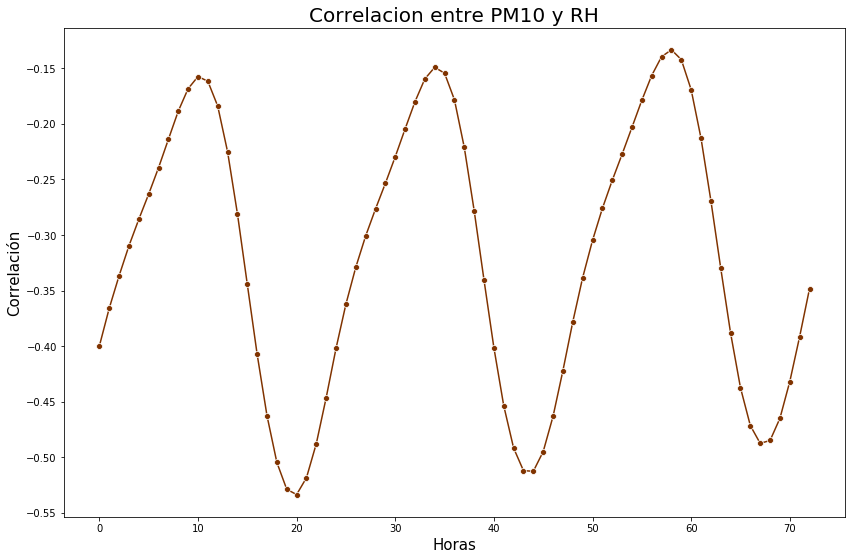

In [66]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_rh = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_RH_72, marker = 'o',  color='#803300', ax=ax)

pm10_rh.axes.set_title("Correlacion entre PM10 y RH",fontsize=20)
pm10_rh.set_xlabel("Horas",fontsize=15)
pm10_rh.set_ylabel("Correlación",fontsize=15)
pm10_rh.tick_params(labelsize=10)
plt.show()

### PM10 y TMP

In [87]:
PM10_TMP_72 = PM10_72[PM10_72['indicador contaminante'].isin(['TMP'])]

In [88]:
PM10_TMP_72.reset_index(inplace = True, drop = True)

In [89]:
del PM10_TMP_72['indicador contaminante']

In [90]:
PM10_TMP_72 = PM10_TMP_72.rename(columns = {'index' : 'Contaminante'})

In [91]:
PM10_TMP_72['horas'] = PM10_TMP_72.index
PM10_TMP_72.head()

,Contaminante,PM10,horas
0,TMP,0.083053,0
1,TMP_1,0.032874,1
2,TMP_2,-0.007718,2
3,TMP_3,-0.041558,3
4,TMP_4,-0.069599,4


In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_tmp = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_TMP_72, marker = 'o',  color='#999900', ax=ax)

pm10_tmp.axes.set_title("Correlacion entre PM10 y TMP",fontsize=20)
pm10_tmp.set_xlabel("Horas",fontsize=15)
pm10_tmp.set_ylabel("Correlación",fontsize=15)
pm10_tmp.tick_params(labelsize=10)
plt.show()

### PM10 Y WSP

In [82]:
PM10_WSP_72 = PM10_72[PM10_72['indicador contaminante'].isin(['WSP'])]

In [83]:
PM10_WSP_72.reset_index(inplace = True, drop = True)

In [84]:
del PM10_WSP_72['indicador contaminante']

In [85]:
PM10_WSP_72 = PM10_WSP_72.rename(columns = {'index' : 'Contaminante'})

In [86]:
PM10_WSP_72['horas'] = PM10_WSP_72.index
PM10_WSP_72.head()

,Contaminante,PM10,horas
0,WSP,-0.057010,0
1,WSP_1,-0.125935,1
2,WSP_2,-0.190311,2
3,WSP_3,-0.237135,3
4,WSP_4,-0.272773,4


In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_wsp = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_WSP_72, marker = 'o',  color='#ff3377', ax=ax)

pm10_wsp.axes.set_title("Correlacion entre PM10 y WSP",fontsize=20)
pm10_wsp.set_xlabel("Horas",fontsize=15)
pm10_wsp.set_ylabel("Correlación",fontsize=15)
pm10_wsp.tick_params(labelsize=10)
plt.show()

### PM10 y WDR

In [ ]:
PM10_WDR_72 = PM10_72[PM10_72['indicador contaminante'].isin(['WDR'])]

In [ ]:
PM10_WDR_72.reset_index(inplace = True, drop = True)

In [ ]:
del PM10_WDR_72['indicador contaminante']

In [ ]:
PM10_WDR_72 = PM10_WDR_72.rename(columns = {'index' : 'Contaminante'})

In [ ]:
PM10_WDR_72['horas'] = PM10_WDR_72.index
PM10_WDR_72.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
pm10_wdr = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_WDR_72, marker = 'o',  color='#00b3b3', ax=ax)

pm10_wdr.axes.set_title("Correlacion entre PM10 y WDR",fontsize=20)
pm10_wdr.set_xlabel("Horas",fontsize=15)
pm10_wdr.set_ylabel("Correlación",fontsize=15)
pm10_wdr.tick_params(labelsize=10)
plt.show()

### PM10 Y PM10

In [68]:
PM10_PM10_72 = PM10_72[PM10_72['indicador contaminante'].isin(['PM1', 'PM10'])]

In [69]:
PM10_PM10_72.reset_index(inplace = True, drop = True)

In [70]:
del PM10_PM10_72['indicador contaminante']

In [71]:
PM10_PM10_72 = PM10_PM10_72.rename(columns = {'index' : 'Contaminante'})

In [72]:
PM10_PM10_72['horas'] = PM10_PM10_72.index
PM10_PM10_72.head()

,Contaminante,PM10,horas
0,PM10,1.000000,0
1,PM10_1,0.910002,1
2,PM10_2,0.794762,2
3,PM10_3,0.679225,3
4,PM10_4,0.581328,4


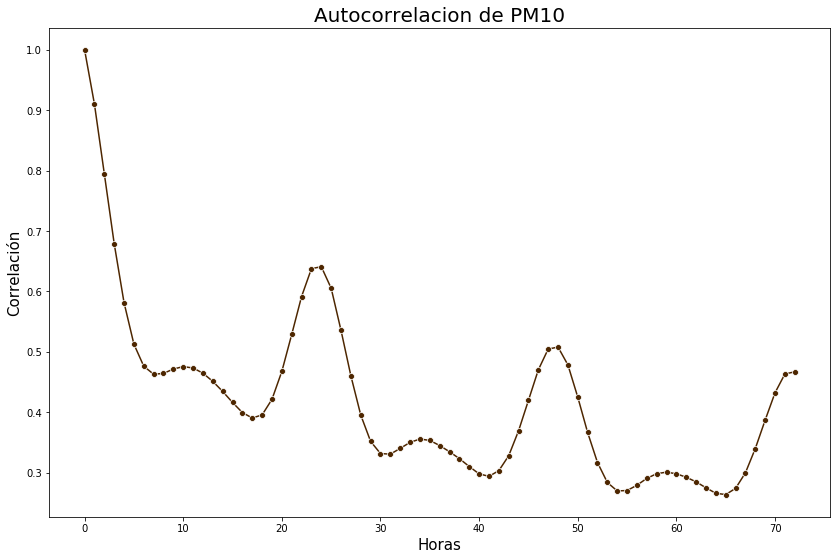

In [73]:
fig, ax = plt.subplots(figsize=(14,9))
pm10 = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_PM10_72, marker = 'o',  color='#4d2600', ax=ax)

pm10.axes.set_title("Autocorrelacion de PM10",fontsize=20)
pm10.set_xlabel("Horas",fontsize=15)
pm10.set_ylabel("Correlación",fontsize=15)
pm10.tick_params(labelsize=10)
plt.show()

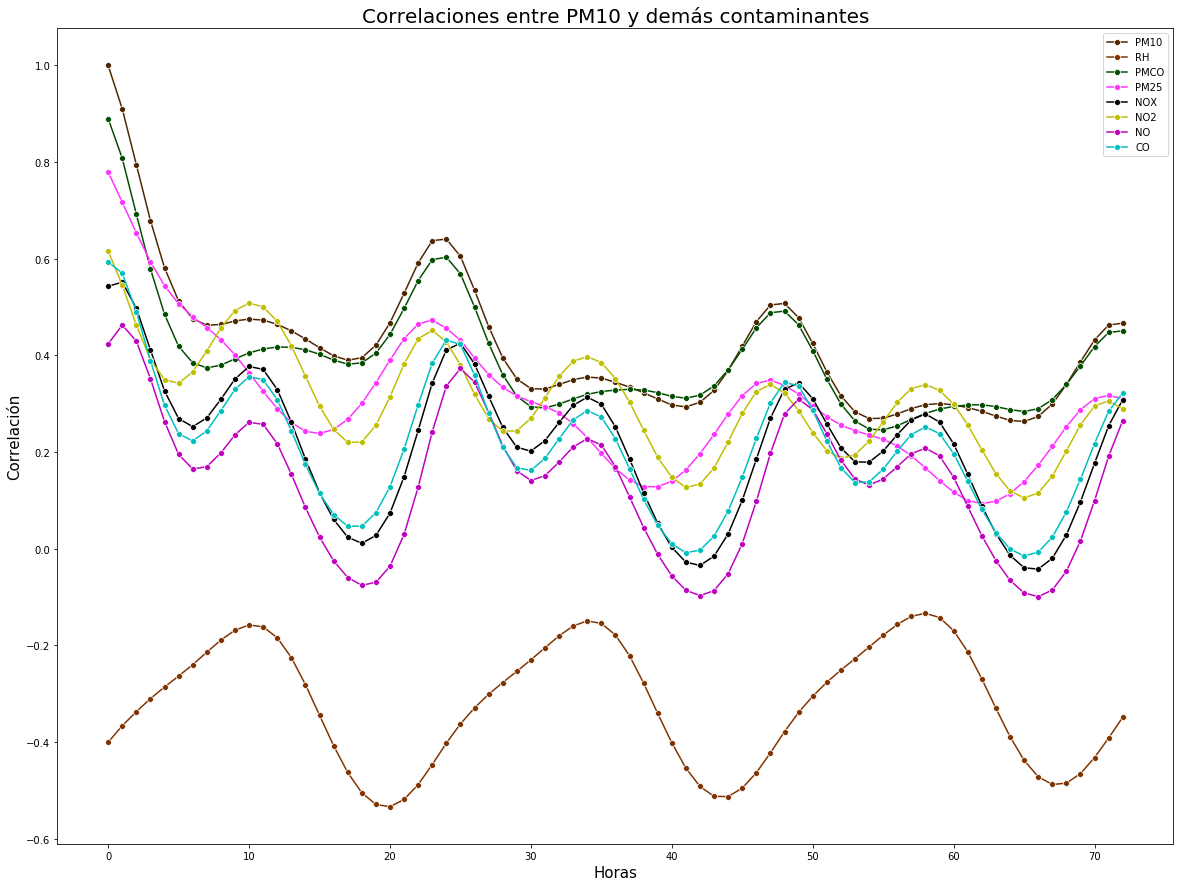

In [80]:
fig, ax = plt.subplots(figsize=(20,15))

pm10 = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_PM10_72, marker = 'o',  color='#4d2600', ax=ax)
pm10_rh = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_RH_72, marker = 'o',  color='#803300', ax=ax)
pm10_pmco = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_PMCO_72, marker = 'o',  color='#004d00', ax=ax)
pm10_pm25 = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_PM25_72, marker = 'o',  color='#ff33ff', ax=ax)
pm10_nox = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_NOX_72, marker = 'o',  color='k', ax=ax)
pm10_no2 = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_NO2_72, marker = 'o',  color='y', ax=ax)
pm10_no = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_NO_72, marker = 'o',  color='m', ax=ax)
pm10_co = sns.lineplot(x = 'horas', y = 'PM10', data = PM10_CO_72, marker = 'o',  color='c', ax=ax)

# ax.set_xticklabels(PM10_UVB_72['horas'])
ax.legend(['PM10', 'RH', 'PMCO', 'PM25', 'NOX',
           'NO2', 'NO', 'CO'], facecolor='w')
ax.set_title('Correlaciones entre PM10 y demás contaminantes', fontsize=20)
ax.set_ylabel('Correlación' , fontsize=15)
ax.set_xlabel('Horas', fontsize=15)

plt.show()

NameError: name 'O3_PM10_72' is not defined

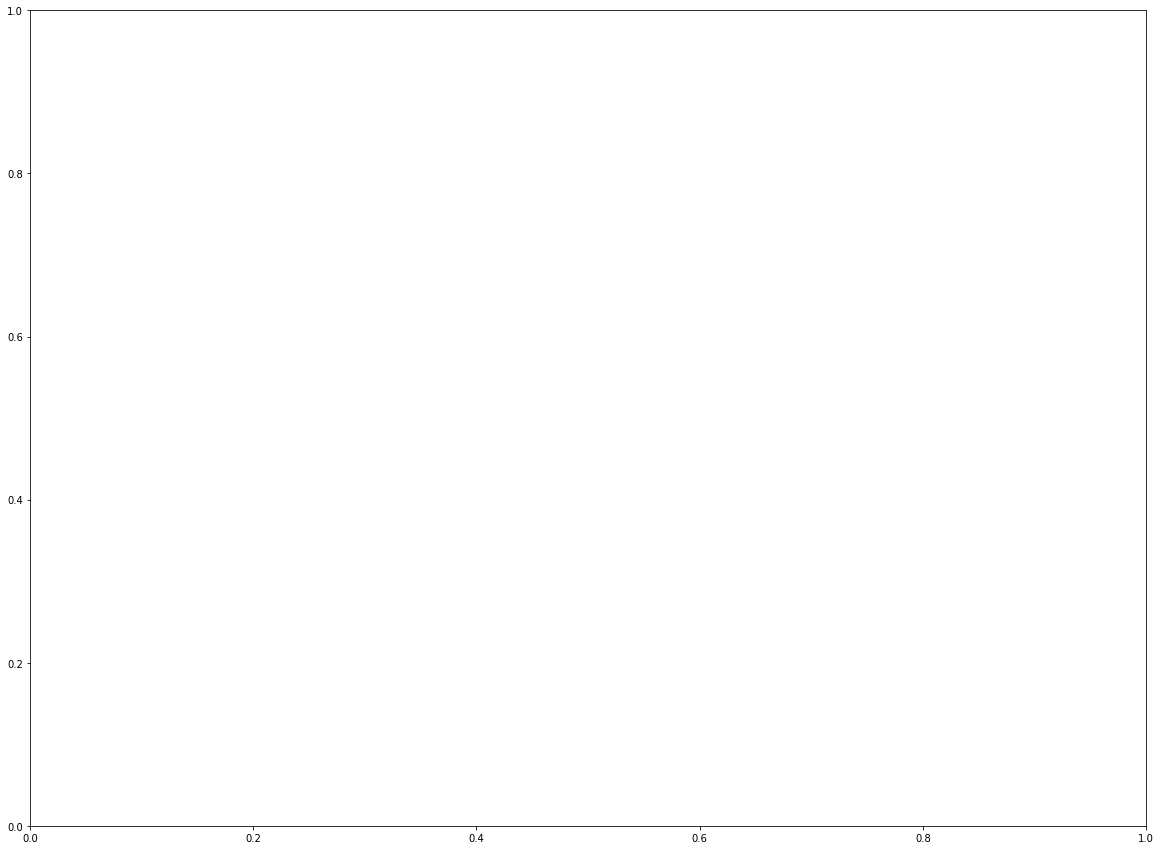

In [92]:
fig, ax = plt.subplots(figsize=(20,15))

o3_pm10 = sns.lineplot(x = 'horas', y = 'O3', data = O3_PM10_72, marker = 'o',  color='#4d2600', ax=ax)
o3_wsp = sns.lineplot(x = 'horas', y = 'O3', data = O3_WSP_72, marker = 'o',  color='#ff3377', ax=ax)
o3_tmp = sns.lineplot(x = 'horas', y = 'O3', data = O3_TMP_72, marker = 'o',  color='#999900', ax=ax)
o3_rh = sns.lineplot(x = 'horas', y = 'O3', data = O3_RH_72, marker = 'o',  color='#803300', ax=ax)
o3_o3 = sns.lineplot(x = 'horas', y = 'O3', data = O3_O3_72, marker = 'o',  color='#800080', ax=ax)
o3_nox = sns.lineplot(x = 'horas', y = 'O3', data = O3_NOX_72, marker = 'o',  color='k', ax=ax)
o3_uvb = sns.lineplot(x = 'horas', y = 'O3', data = O3_UVB_72, marker = 'o',  color='r', ax=ax)
o3_uva = sns.lineplot(x = 'horas', y = 'O3', data = O3_UVA_72, marker = 'o',  color='b', ax=ax)

# ax.set_xticklabels(O3_UVB_72['horas'])
ax.legend(['PM10','WSP', 'TMP', 'RH', 'O3', 'NOX','UVB', 'UVA'], facecolor='w')
plt.show()